In [1]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py

In [2]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [3]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('TBP, ddpg, td3, sac, ppo, models, td3_models, sac_models, ppo_models, ddpg_models', folder_name=True)

from DDPG import DDPG
from DDPG import MLPActorCritic
from SAC import SAC
from utils.run_utils import setup_logger_kwargs
import TBP
from TBP import ThreeBodyEnv
from PPO import PPO
from TD3 import TD3
import torch

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
DDPG.py already exists.
Directory 'model_DDPG' already exists and is not empty.
model_DDPG/actor_cuda.pth already exists.
model_DDPG/q_cuda.pth already exists.
Directory 'model_DDPG' already exists and is not empty.
model_DDPG/actor_cuda.pth already exists.
model_DDPG/q_cuda.pth already exists.
PPO.py already exists.
Directory 'model_PPO' already exists and is not empty.
model_PPO/actor_cpu.pth already exists.
model_PPO/v_cpu.pth already exists.
SAC.py already exists.
Directory 'model_SAC' already exists and is not empty.
model_SAC/actor_cpu.pth already exist

## DDPGG

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/Standard/initial_condition_shift/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device_":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/Standard/initial_condition_shift/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([-0.1749])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<DDPG.DDPG object at 0x116730810>"

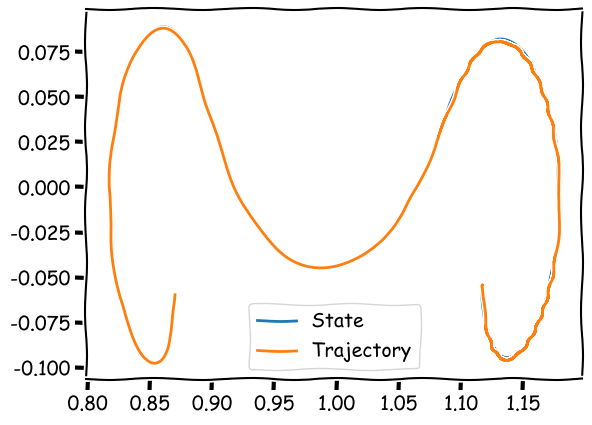

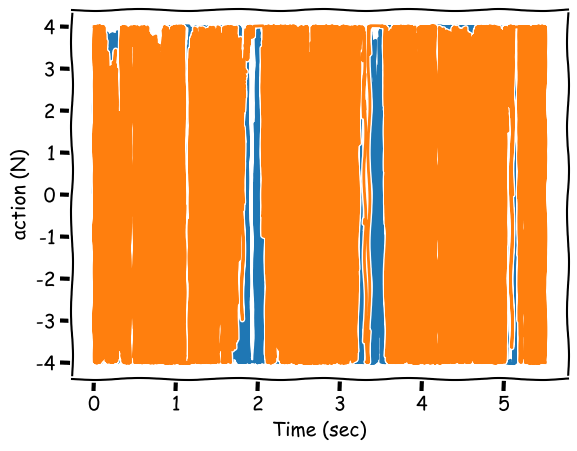

In [4]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

ac_kwargs = dict(hidden_sizes=[hid] * l)
logger_kwargs = setup_logger_kwargs(exp_name, seed)

ddpg = DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device_=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

ddpg.load(from_device_to_load='cuda', filepath='model_DDPG/')
ddpg.test(fun_mode=True)
ddpg.env.second_player = False

## TD3

Logging data to /tmp/experiments/1751651261/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "env_fn":	"<function <lambda> at 0x15eebf7e0>",
    "epochs":	100,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "max_ep_len":	30000,
    "noise_clip":	0.5,
    "num_test_episodes":	10,
    "pi_lr":	0.001,
    "policy_delay":	2,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<TD3.TD3 object at 0x15d235690>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    32,
                    32
                ]
            },
            "act_noise":	0.1,
            "actor_critic":	"MLPActorCritic",
            "batch_size":	1024,
            "env_fn":	"<function <lambda> at 0x15eebf7e0>",
            "epochs":	100,
            "

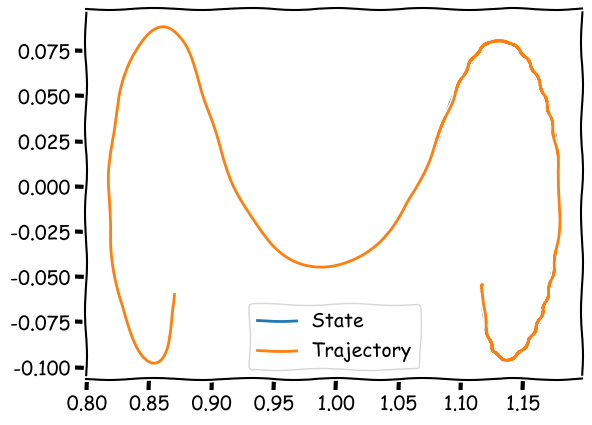

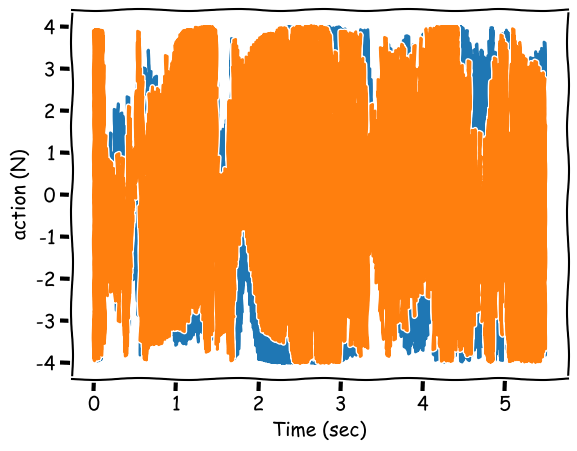

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(colorize(f"Device is {device}! 🥰😎", 'green', bold=True))
# Define variables directly
env = ThreeBodyEnv(trajectory)
hid = 32
l = 2
gamma = 0.99
seed = 0
epochs = 50
exp_name = 'td3'
steps_per_epoch_=30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid]*l)
states_array = []
# logger_kwargs = setup_logger_kwargs(exp_name, seed)
reward_array=[]

td3 = TD3(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), epochs=100, ac_kwargs=ac_kwargs, steps_per_epoch=steps_per_epoch_, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)

td3.load(filepath='model_TD3/')


# test td3 agent (not trained)
td3.test(fun_mode=True, deterministic=True, save_data=False)

# zs_td3.test(fun_mode=True)
td3.env.second_player = False

## SAC

Logging data to /tmp/experiments/1751651263/progress.txt
Saving config:

{
    "ac_kwargs_class":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "alpha":	0.2,
    "batch_size":	1024,
    "device_class":	"cpu",
    "env_fn":	"<function <lambda> at 0x15eefbf60>",
    "epochs":	100,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "lr":	0.001,
    "max_ep_len":	30000,
    "num_test_episodes":	10,
    "num_updates":	10,
    "polyak":	0.995,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<SAC.SAC object at 0x15ef09ed0>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    64,
                    64
                ]
            },
            "actor_critic":	"MLPActorCritic",
            "alpha":	0.2,
            "batch_size":	1024,
            "device":	"cpu",
            "env_fn":	"<function <lambda> at 0x15eefbf60>",
            "epochs":	100,
    

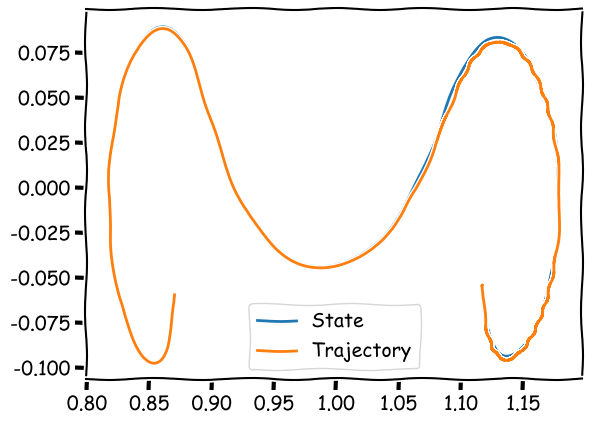

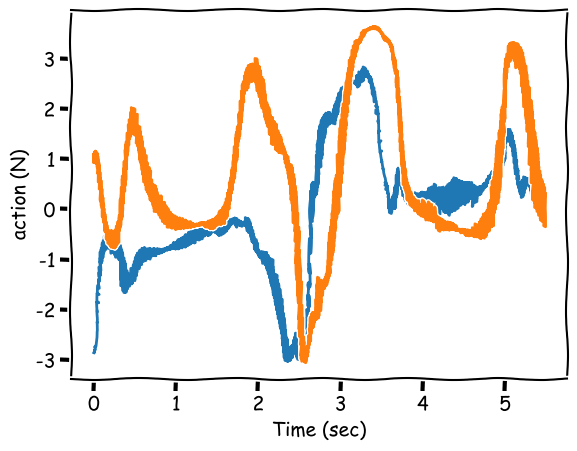

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(colorize(f"Device is {device}! 🥰😎", 'green', bold=True))
# Define variables directly
env = ThreeBodyEnv(trajectory)
hid = 64
l = 2
gamma = 0.99
seed = 0
epochs = 50
exp_name = 'sac'
steps_per_epoch_=30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid]*l)
states_array = []
# logger_kwargs = setup_logger_kwargs(exp_name, seed)
reward_array=[]

sac = SAC(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), epochs=100, device_class=device, ac_kwargs_class=ac_kwargs, steps_per_epoch=steps_per_epoch_, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)


sac.load(filepath='model_SAC/')


# test sac agent (not trained)
sac.test(fun_mode=True, deterministic=True, save_data=False)
sac.env.second_player = False

## PPO

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/Standard/initial_condition_shift/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "clip_ratio":	0.2,
    "env":	{
        "<ThreeBodyEnv instance>":	{
            "action_space":	{
                "Box(-4.0, 4.0, (2,), float32)":	{
                    "_np_random":	null,
                    "_shape":	[
                        2
                    ],
                    "bounded_above":	"[ True  True]",
                    "bounded_below":	"[ True  True]",
                    "dtype":	"float32",
                    "high":	"[4. 4.]",
                    "high_repr":	"4.0",
                    "low":	"[-4. -4.]",
                    "low_repr":	"-4.0"
                }
            },
            "dt":	0.001,
            "error_range":	0.01,
            "final_range":	0.001,
            "max_steps":	60

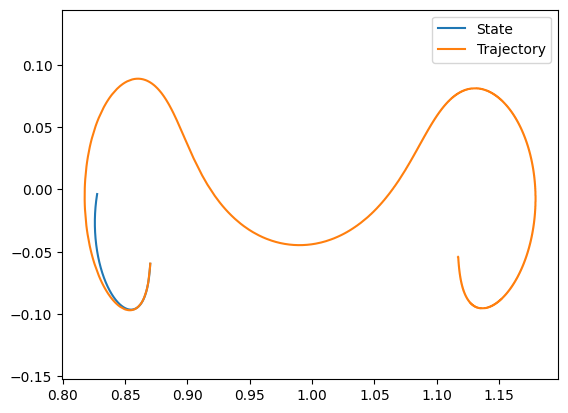

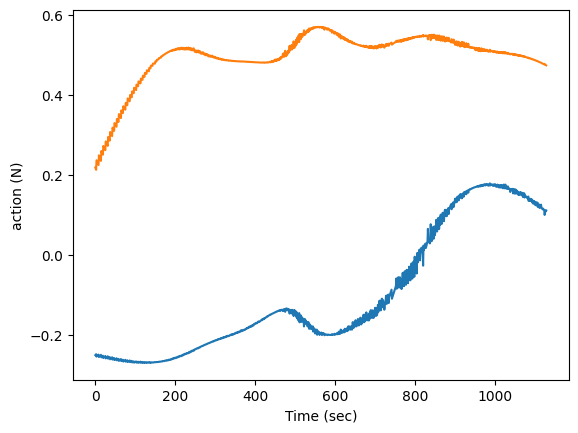

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game
(9999, 6)


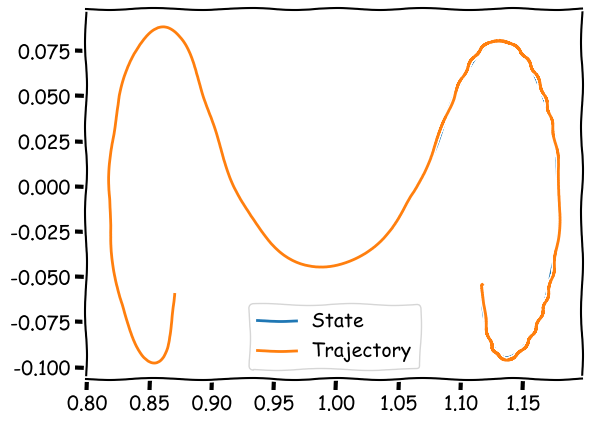

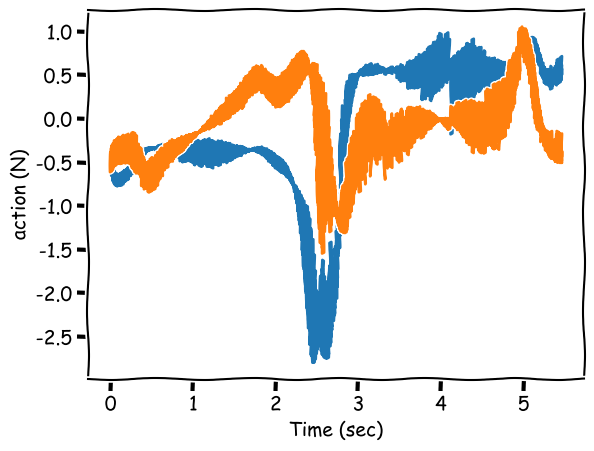

In [7]:
from PPO import PPO

# Define constants
HID = 32
L = 2
GAMMA = 0.99
SEED = 0
STEPS = 30000
EPOCHS = 100
EXP_NAME = 'PPO_3BP'
ac_kwargs = dict(hidden_sizes=[HID] * L)
# Use the constants directly


logger_kwargs = setup_logger_kwargs(EXP_NAME, SEED)

ppo = PPO(ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), ac_kwargs=ac_kwargs, gamma=GAMMA,
            seed=SEED, steps_per_epoch=STEPS, logger_kwargs=logger_kwargs)
# test PPO agent (not trained)
ppo.test(deterministic=True)

ppo.load(filepath='model_PPO/')
ppo.test(fun_mode=True)
ppo.env.second_player = False

In [8]:
class InitialConditionShiftWrapper(gym.Wrapper):
    """
    Gym environment wrapper that:
      - Adds a random Gaussian shift to the initial condition (obs) at the beginning of each episode.
      - Adds continuous observation noise at every step.
    This wrapper susacrts the Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, shift_std=0.05, obs_noise_std=0.01):
        """
        :param env:               The original environment.
        :param shift_std:         Standard deviation for shifting the initial state.
        :param obs_noise_std:     Standard deviation for adding noise to observations at each step.
        """
        super(InitialConditionShiftWrapper, self).__init__(env)
        self.shift_std = shift_std      # How much we shift the initial condition
        self.obs_noise_std = obs_noise_std  # How much noise to add to observations each step

    def reset(self, **kwargs):
        """
        Perturbs the initial state at the beginning of each episode to simulate an initial condition shift,
        then also applies observation noise.
        """
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
        else:
            obs = result
            info = {}

        # Shift the initial condition (perturb the starting state).
        obs = self._shift_initial_condition(obs)
        # Also apply observation noise right after shifting.
        obs = self._apply_obs_noise(obs)

        return (obs, info) if isinstance(result, tuple) else obs

    def step(self, action):
        """
        Takes a step in the environment, then adds noise to the observation.
        """
        obs, reward, terminated, truncated, info = self.env.step(action)
        # Apply observation noise
        obs = self._apply_obs_noise(obs)
        return obs, reward, terminated, truncated, info

    def _shift_initial_condition(self, initial_state):
        """
        Shifts the initial condition by adding Gaussian noise to the initial state.
        """
        state = np.array(initial_state, dtype=np.float32)
        shift = np.random.normal(0, self.shift_std, size=state.shape)
        # Clip to the valid observation space
        shifted_state = state + shift
        if hasattr(self.env, 'observation_space'):
            low, high = self.env.observation_space.low, self.env.observation_space.high
            shifted_state = np.clip(shifted_state, low, high)
        return shifted_state

    def _apply_obs_noise(self, observation):
        """
        Adds Gaussian noise to the observation at each step.
        """
        obs = np.array(observation, dtype=np.float32)
        noise = np.random.normal(0, self.obs_noise_std, size=obs.shape) * obs
        noisy_obs = obs + noise
        # Clip if observation space is defined
        # if hasattr(self.env, 'observation_space'):
        #     low, high = self.env.observation_space.low, self.env.observation_space.high
        #     noisy_obs = np.clip(noisy_obs, low, high)
        return noisy_obs

def make_env_initial_condition_shift(error_range=0.01, final_range=0.001, shift_std=0.05, obs_noise_std=0.01):
    """
    Creates the ThreeBodyEnv wrapped with an initial condition shift and continuous observation noise.
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return InitialConditionShiftWrapper(env, shift_std=shift_std, obs_noise_std=obs_noise_std)


In [9]:
def run_episode(agent, env_fn, max_steps=10000, deterministic=True, agent_no="ddpg"):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Args:
        agent: The RL agent with an action selection method
        env_fn: Function that creates the environment
        max_steps: Maximum steps per episode
        deterministic: Whether to use deterministic action selection

    Returns:
        total_reward: Sum of rewards collected in the episode.
    """
    env = env_fn()

    obs, _ = env.reset()  # Gymnasium reset returns (obs, info)
    total_reward = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        # Select action based on the specified method
        if agent_no == "ddpg":
            action = agent.get_action(obs, 0)
        elif agent_no == "td3":
            action = agent.ac.act(torch.as_tensor(obs, dtype=torch.float32))
        elif agent_no == "sac":
            action = agent.ac.act(torch.as_tensor(obs, dtype=torch.float32, device=device), deterministic=True)
        elif agent_no == "ppo":
            action, _, _ = agent.ac.step(torch.as_tensor(obs, dtype=torch.float32), deterministic=True)
        else:
            raise ValueError(f"Unknown agent type: {agent_no}")
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated  # Determine if the episode is done
        total_reward += reward
        steps += 1

    env.close()
    return total_reward


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000, deterministic=True, agent_name=""):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards.

    Args:
        agent: The RL agent to evaluate
        env_fn: Function that creates the environment
        num_episodes: Number of episodes to run
        max_steps: Maximum steps per episode
        deterministic: Whether to use deterministic action selection
        agent_name: Name of the agent for logging purposes

    Returns:
        returns: List of cumulative rewards from each episode.
    """
    returns = []
    for i in range(num_episodes):
        ret = run_episode(agent, env_fn, max_steps, deterministic=deterministic, agent_no=agent_name)
        returns.append(ret)
        print(f"{agent_name}: Episode {i+1}/{num_episodes}, Return: {ret:.2f}")
    return returns


In [10]:
# Number of episodes for evaluation
num_episodes = 10

# Update all agents' environment functions to use both actuator disturbance and extra noise
ppo.env_fn = lambda: make_env_initial_condition_shift(shift_std=.1, obs_noise_std=0.1)
sac.env_fn = lambda: make_env_initial_condition_shift(shift_std=.1, obs_noise_std=0.1)
td3.env_fn = lambda: make_env_initial_condition_shift(shift_std=.1, obs_noise_std=0.1)
ddpg.env_fn = lambda: make_env_initial_condition_shift(shift_std=.1, obs_noise_std=0.1)

returns_ddpg = evaluate_agent(ddpg, ddpg.env_fn, num_episodes=num_episodes, agent_name="ddpg")
returns_td3 = evaluate_agent(td3, td3.env_fn, num_episodes=num_episodes, agent_name="td3")
returns_sac = evaluate_agent(sac, sac.env_fn, num_episodes=num_episodes, agent_name="sac")
returns_ppo = evaluate_agent(ppo, ppo.env_fn, num_episodes=num_episodes, agent_name="ppo")

done 🥺
second player was in the game
ddpg: Episode 1/10, Return: -260.00
done 🥺
second player was in the game
ddpg: Episode 2/10, Return: -274.90
done 🥺
second player was in the game
ddpg: Episode 3/10, Return: -264.41
done 🥺
second player was in the game
ddpg: Episode 4/10, Return: -278.71
done 🥺
second player was in the game
ddpg: Episode 5/10, Return: -259.71
done 🥺
second player was in the game
ddpg: Episode 6/10, Return: -275.25
done 🥺
second player was in the game
ddpg: Episode 7/10, Return: -258.64
done 🥺
second player was in the game
ddpg: Episode 8/10, Return: -268.53
done 🥺
second player was in the game
ddpg: Episode 9/10, Return: -274.89
done 🥺
second player was in the game
ddpg: Episode 10/10, Return: -271.66
done 🥺
second player was in the game
td3: Episode 1/10, Return: 562.28
done 🥺
second player was in the game
td3: Episode 2/10, Return: 559.11
done 🥺
second player was in the game
td3: Episode 3/10, Return: 561.53
done 🥺
second player was in the game
td3: Episode 4/10, 

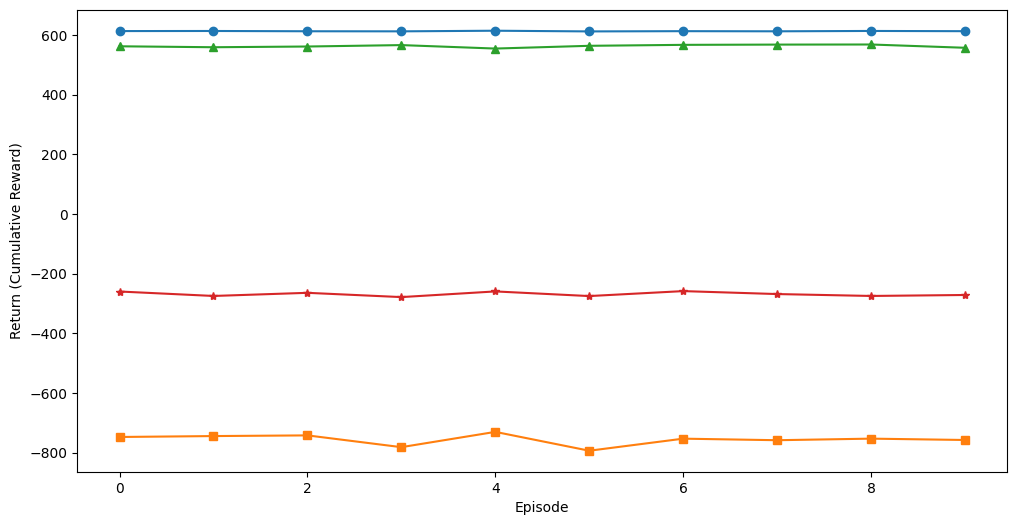

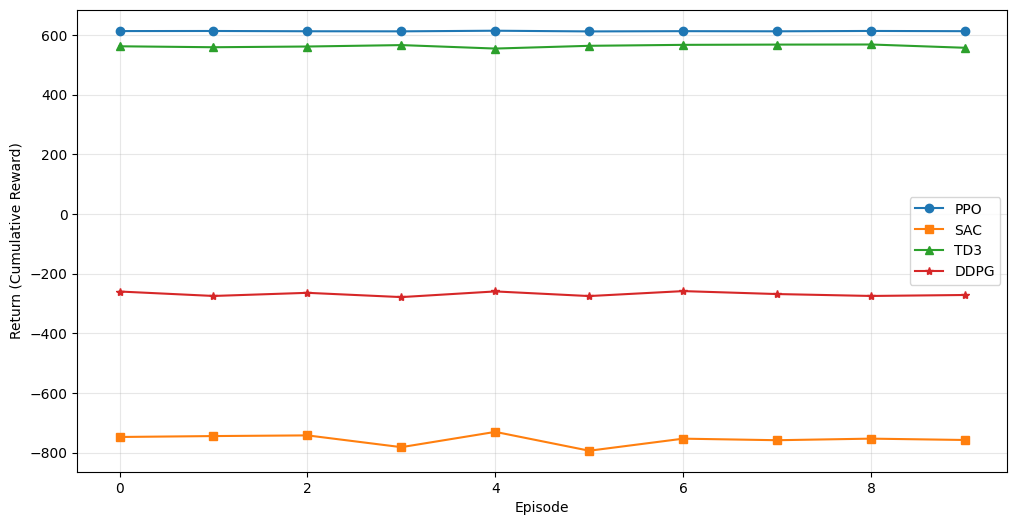

In [12]:
# labels
returns_ppo_label = "PPO"
returns_sac_label = "SAC"
returns_td3_label = "TD3"
returns_ddpg_label = "DDPG"
# Plot the returns for visual comparison
plt.figure(figsize=(12, 6))
plt.plot(returns_ppo, marker='o', label=returns_ppo_label)
plt.plot(returns_sac, marker='s', label=returns_sac_label)
plt.plot(returns_td3, marker='^', label=returns_td3_label)
plt.plot(returns_ddpg, marker='*', label=returns_ddpg_label)
plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
# plt.title(f'Agent Returns under Actuator Disturbance (std={disturbance_std}) and Extra Noise (std={noise_std})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_36101/1472711318.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, patch_artist=True)


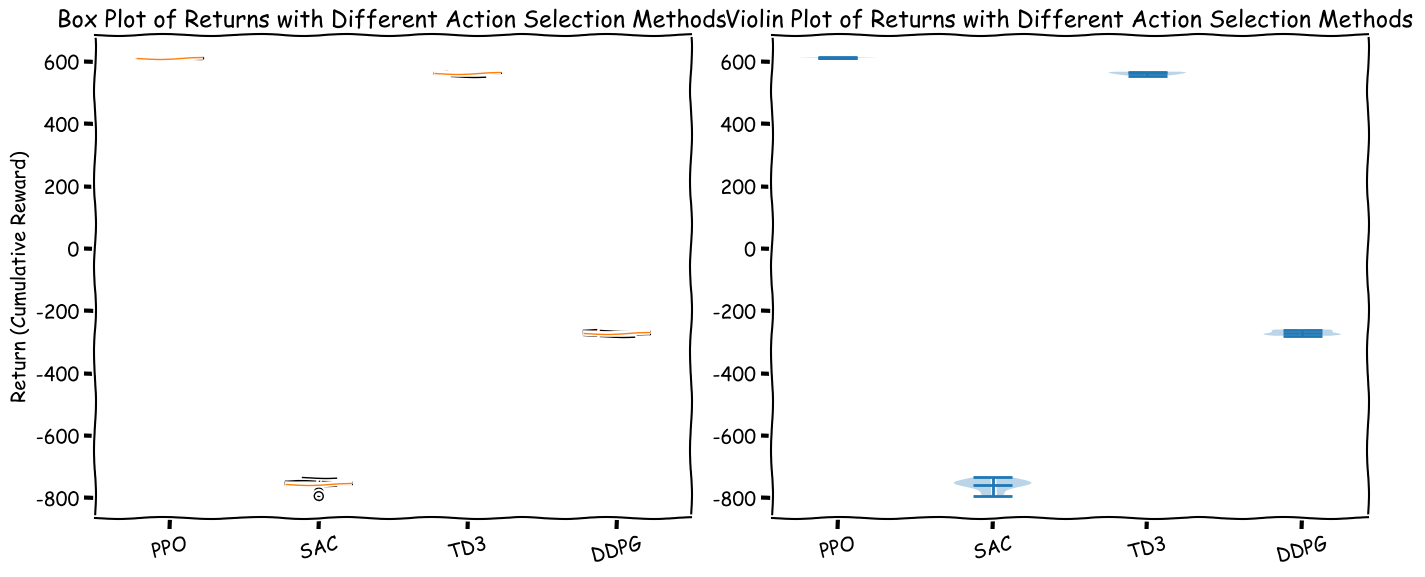

In [13]:
# Create box and violin plots for all algorithms
data = [returns_ppo, returns_sac, returns_td3, returns_ddpg]
labels = [returns_ppo_label, returns_sac_label, returns_td3_label, returns_ddpg_label]

with plt.xkcd():
    # Create a figure with two subplots side-by-side
    plt.figure(figsize=(14, 6))

    # Box Plot
    plt.subplot(1, 2, 1)
    box = plt.boxplot(data, labels=labels, patch_artist=True)

    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightpink', 'lightsalmon']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.title('Box Plot of Returns with Different Action Selection Methods')
    plt.ylabel('Return (Cumulative Reward)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=15)

    # Violin Plot
    plt.subplot(1, 2, 2)
    violin = plt.violinplot(data, showmeans=True)
    plt.xticks([1, 2, 3, 4], labels, rotation=15)
    plt.title('Violin Plot of Returns with Different Action Selection Methods')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [14]:
# Create a DataFrame with all results
df = pd.DataFrame({
    returns_ppo_label: returns_ppo,
    returns_sac_label: returns_sac,
    returns_td3_label: returns_td3,
    returns_ddpg_label: returns_ddpg
})

# Display the head of the dataframe
df.head()


,PPO,SAC,TD3,DDPG
0,613.290481,-747.784376,562.277205,-259.995537
1,613.602008,-744.713459,559.107644,-274.904887
2,612.676835,-742.439082,561.533063,-264.412935
3,612.403105,-781.912368,566.276607,-278.708843
4,614.482170,-730.676754,554.680359,-259.710413


In [15]:
# Calculate summary statistics
summary = df.describe()
print("Summary Statistics:")
print(summary)


Summary Statistics:
              PPO         SAC         TD3        DDPG
count   10.000000   10.000000   10.000000   10.000000
mean   613.076141 -756.464373  562.842990 -268.670893
std      0.704702   18.698527    4.715700    7.490241
min    612.169048 -793.857438  554.680359 -278.708843
25%    612.558336 -758.443150  559.713999 -274.902357
50%    612.957765 -753.378158  563.090932 -270.094906
75%    613.524126 -745.481188  566.902202 -261.099887
max    614.482170 -730.676754  568.284898 -258.640329


In [16]:
# Save results to CSV with timestamp to avoid overwriting
from datetime import datetime
filename = 'evaluation_returns.csv'
df.to_csv(filename, index=False)
print(f"Results saved to {filename}")

# Also save a parameter summary for reference


Results saved to evaluation_returns.csv
